In [1]:
import sys, os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from student import *
from aggregator import *
import matplotlib.pyplot as plt
from analysis import *
from teacher_ensemble import *
import pickle
import tensorflow as tf

In [2]:
states = ["HI", "CA", "PR", "NV", "NM", "OK", "NY", "WA", "AZ",  "MD",
"TX", "VA", "MA", "GA", "CT", "OR", "IL", "RI", "NC", "CO", "DE", "LA", "UT",
"FL", "MS", "SC", "AR", "SD", "AL", "MI", "KS", "ID", "MN", "TN", "OH", "IN",
"MT", "PA", "NE", "MO", "WY", "ND", "WI", "KY", "NH", "ME", "IA", "VT", "WV"] 

In [3]:
target = 0
path = "../checkpoint_sex/"+states[target]+"/"+ states[target] + "_unfair.pkl"
with open(path, "rb") as f:
        tchr = pickle.load(f)
features, labels, group = tchr.dataset

In [5]:
def attack0(teacher_id, fair=False):
    if fair:
        path = "../checkpoint_sex/"+states[teacher_id]+"/"+ states[teacher_id] + "_fair.pkl"
    else:
        path = "../checkpoint_sex/"+states[teacher_id]+"/"+ states[teacher_id] + "_unfair.pkl"
    with open(path, "rb") as f:
            tchr = pickle.load(f)
    x_train, x_test, y_train, y_test, g_train, g_test = tchr.splited_data
    if  not isinstance(x_train, pd.DataFrame):
        x_train = pd.DataFrame(x_train, columns=ACSEmployment.features)
    D_2 = x_train.copy()
    sen_attr = "SEX"
    D_2[sen_attr] = D_2[sen_attr].map({1: 2, 2:2})
    D_1 = x_train.copy()
    D_1[sen_attr] = D_1[sen_attr].map({1: 1, 2:1})
    # to numpy
    np_d_1= np.asarray(D_1)
    np_d_2= np.asarray(D_2)
    preds1 = tchr.model.predict(np_d_1)
    preds2 = tchr.model.predict(np_d_2)
    n = len(preds1)
    reconst_attr = []
    rac=0
    for i in range(n):
        y_1 = preds1[i]
        y_2 = preds2[i]
        dist = [abs(np.round(y_2) - y_2), abs(np.round(y_1) - y_1)]
        rac = np.argmin(dist)
        reconst_attr.append(int(rac))
    ori_data = x_train.copy()
    ori_data[sen_attr] = ori_data[sen_attr].map({1: 1, 2: 0})
    ori_data.insert(15, "RACREC", reconst_attr)
    eq = ori_data[ori_data[sen_attr] == ori_data["RACREC"]].shape
    neq = ori_data[ori_data[sen_attr] != ori_data["RACREC"]].shape
    attack_acc = eq[0]/(eq[0] + neq[0])
    return attack_acc

attack0(0, True)

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 806us/step
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 739us/step


0.4915327833260964

In [6]:
stats = {}
for i in range(len(states)):
    stats[states[i]] = [attack0(i), attack0(i, True)]
print("Done")

288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 724us/step
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 6s 753us/step
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 6s 739us/step
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 5s 701us/step
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 6s 742us/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
590/590 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step
579/579 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step
579/579 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
579/579 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step
579/579 ━━━━━━━━━━━━━━━━━━━━ 0s 685us/step
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step
387/387 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
731/731 ━━━━━━━━━━━━━━━━━━━━ 1s 715us/step
731

601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 832us/step
601/601 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step
601/601 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step
601/601 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step
170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 798us/step
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 723us/step
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 780us/step
970/970 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step
2004/2004 ━━━━━━━━━━━━━━━━━━━━ 2s 798us/step
2004/2004 ━━━━━━━━━━━━━━━━━━━━ 2s 794us/step
2004/2004 ━━━━━━━━━━━━━━━━━━━━ 2s 806us/step
2004/2004 ━━━━━━━━━━━━━━━━━━━━ 1s 703us/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 1s 830us/step
578/578 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step
321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step
321

In [6]:
len(stats.keys())

49

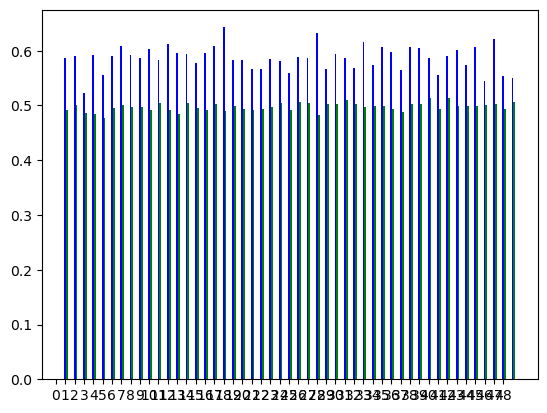

In [7]:
b_width = 0.2
x = 0
for i in range(49):
    plt.bar([i+1, i+1 + b_width], stats[states[i]], width=b_width, color=["blue", "green"], label=["unfair", "fair"])
    #x += 2*b_width+0.5
plt.xticks(list(range(len(stats.keys()))))
plt.show()

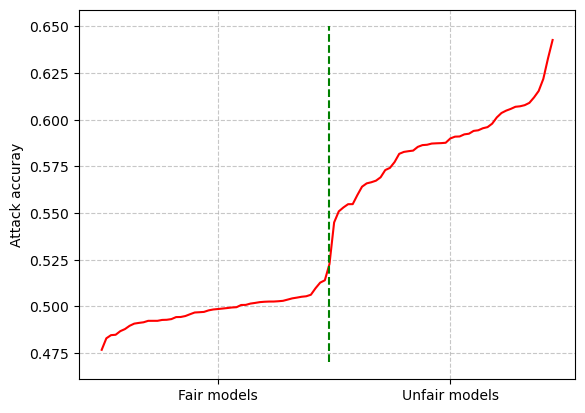

In [8]:
acc_fair = []
acc_unfair = []
for st in stats.values():
    acc_unfair.append(st[0])
    acc_fair.append(st[1])
    
acc_unfair.sort()
acc_fair.sort()

acc_stats = acc_fair + acc_unfair
x = len(acc_fair)
plt.plot(list(range(len(acc_stats))), acc_stats, color="red")
plt.plot([x, x], [0.47, 0.65], "g--")
plt.ylabel("Attack accuray")
plt.xticks([25, 75], ["Fair models", "Unfair models"])
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Attack_accuracy_fairness_ordered.png")

In [9]:
acc_fair = {}
acc_unfair = {}
for st in stats.keys():
    path = "../checkpoint_sex/"+st+"/"+ st + "_fair.pkl"
    with open(path, "rb") as f:
        tchr = pickle.load(f)
    acc_fair[tchr.metrics["SPD"]] = stats[st][1]
    path = "../checkpoint_sex/"+st+"/"+ st + "_unfair.pkl"
    with open(path, "rb") as f:
        tchr = pickle.load(f)
    acc_unfair[tchr.metrics["SPD"]] = stats[st][0]

In [10]:
sorted_acc_unfair = dict(sorted(acc_unfair.items()))
sorted_acc_fair = dict(sorted(acc_fair.items()))

In [11]:
x_axis = list(sorted_acc_fair.keys()) + list(sorted_acc_unfair.keys())
y_axis = list(sorted_acc_fair.values()) + list(sorted_acc_unfair.values())

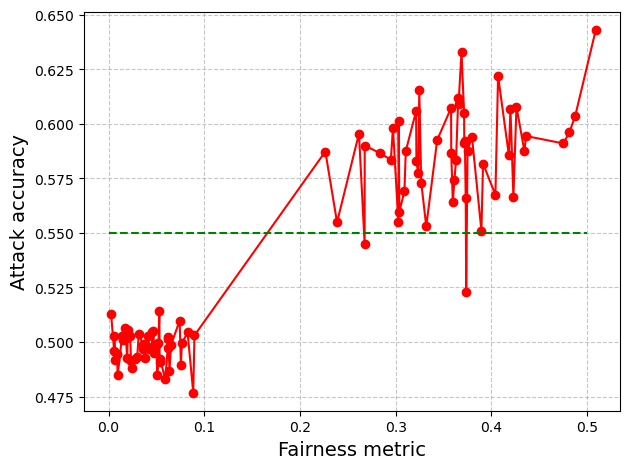

In [13]:
plt.plot(x_axis, y_axis, color="r",marker='o')
x = 0.0
plt.plot([x, 0.5], [0.55, 0.55], "g--")
plt.ylabel("Attack accuracy", fontsize=14)
plt.xlabel("Fairness metric", fontsize=14)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig("Attack_accuracy_fairness.png")

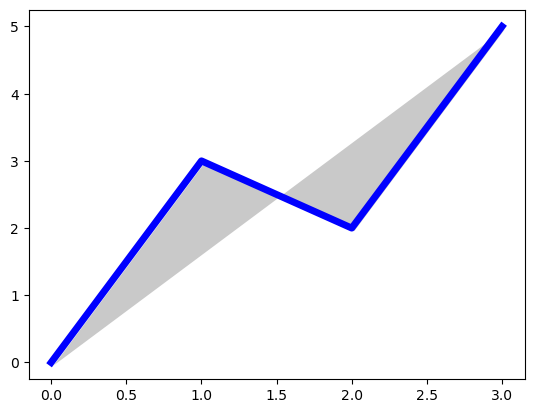

In [38]:
import matplotlib.patheffects as path_effects
plt.plot([0, 3, 2, 5], linewidth=5, color='blue',
         path_effects=[path_effects.SimplePatchShadow(),
                       path_effects.Normal()])
plt.show()